### Logistic Regression
Baseline model to get a sense of what kind of accuracy we get initially.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
train = pd.read_csv("../03-data-creation/train_processed_2.csv", low_memory = False)
test = pd.read_csv("../03-data-creation/test_processed_2.csv", low_memory = False)

display(train.head())
display(test.head())

,Unnamed: 0,id,v1,v2,v3,v4,v6,v7,v8,v9,...,v251,v253,v254,v255,v256,v257,v258,v263,cntry,satisfied
0,0,9948,2,2,74,11010,2,2,2,2,...,40,2,2,1,2,2,1941,-1,0,0
1,1,25601,4,2,58,11010,2,2,2,2,...,39,2,2,2,2,2,1957,-1,0,0
2,2,8592,6,2,47,11010,2,2,1,2,...,35,4,2,1,2,2,1968,1963,0,1
3,3,29593,10,2,22,11010,2,2,2,2,...,50,3,2,1,2,2,1993,-1,0,0
4,4,4252,0,1,24,11010,2,2,2,2,...,38,1,2,1,2,2,1991,-1,0,1


,Unnamed: 0,id,v1,v2,v3,v4,v6,v7,v8,v9,...,v250,v251,v253,v254,v255,v256,v257,v258,v263,cntry
0,0,14061,0,1,63,15020,2,2,1,2,...,40,48,1,2,1,2,2,1952,-1,0
1,1,16467,5,2,44,21070,1,2,2,1,...,40,45,2,2,1,2,2,1971,-1,0
2,2,25725,10,2,21,11010,2,1,2,2,...,38,38,4,2,2,1,1,1994,-1,0
3,3,9100,2,2,75,11010,2,2,2,2,...,40,40,1,2,1,2,2,1940,1946,0
4,4,32597,0,1,22,11010,2,2,2,2,...,40,40,2,2,1,2,2,1993,-1,0


In [3]:
train['satisfied'].value_counts()

1    15626
0    14454
Name: satisfied, dtype: int64

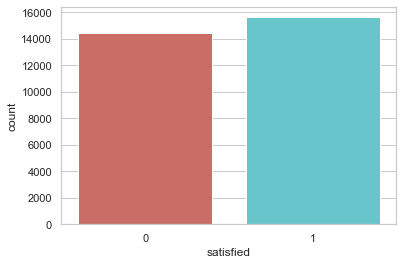

In [5]:
sns.countplot(x='satisfied', data=train, palette='hls')
plt.show()

In [6]:
print("percentage of not satisfied is", (len(train[train['satisfied']==0]) / train.shape[0])*100)
print("percentage of satisfied is", (len(train[train['satisfied']==1]) / train.shape[0])*100)

percentage of not satisfied is 48.05186170212766
percentage of satisfied is 51.94813829787234


In [7]:
X_cols = list(train.columns[2:])
X_cols.remove('satisfied')
X = train.loc[:, X_cols]
y = train.loc[:, train.columns == 'satisfied']

display(X)
display(y)

,v1,v2,v3,v4,v6,v7,v8,v9,v10,v12,...,v250,v251,v253,v254,v255,v256,v257,v258,v263,cntry
0,2,2,74,11010,2,2,2,2,1,2,...,40,40,2,2,1,2,2,1941,-1,0
1,4,2,58,11010,2,2,2,2,1,2,...,39,39,2,2,2,2,2,1957,-1,0
2,6,2,47,11010,2,2,1,2,1,1,...,30,35,4,2,1,2,2,1968,1963,0
3,10,2,22,11010,2,2,2,2,1,2,...,40,50,3,2,1,2,2,1993,-1,0
4,0,1,24,11010,2,2,2,2,1,2,...,38,38,1,2,1,2,2,1991,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30075,0,1,72,14120,2,2,2,2,1,2,...,40,60,2,2,-1,-1,2,1942,1945,20
30076,0,1,38,14120,2,2,2,2,1,2,...,40,40,4,2,1,-1,2,1976,-1,20
30077,5,2,49,14120,2,2,2,2,1,1,...,40,48,3,2,1,-1,2,1965,1967,20
30078,0,1,16,14120,2,2,2,2,1,2,...,-1,-1,3,-1,-1,-1,2,1998,1972,20


,satisfied
0,0
1,0
2,1
3,0
4,1
...,...
30075,1
30076,1
30077,0
30078,1


In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 3096)

In [9]:
y['satisfied'].value_counts()

1    15626
0    14454
Name: satisfied, dtype: int64

In [10]:
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.444202
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.358     
Dependent Variable: satisfied        AIC:              27123.2173
Date:               2020-03-28 13:58 BIC:              28785.5405
No. Observations:   30080            Log-Likelihood:   -13362.   
Df Model:           199              LL-Null:          -20827.   
Df Residuals:       29880            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
v1       -0.0165     0.0081    -2.0459   0.0408   -0.0323   -0.0007
v2       -0.0904     0.0212    -4.2714   0.0000   -0.1319 

In [11]:
full_log_model = LogisticRegression()
full_log_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
expected_y = y_test
predicted_y = full_log_model.predict(X_test)


# Summarize model fit
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))
print(); print(metrics.roc_auc_score(expected_y, predicted_y))


              precision    recall  f1-score   support

           0       0.60      0.52      0.55      2907
           1       0.60      0.68      0.64      3109

    accuracy                           0.60      6016
   macro avg       0.60      0.60      0.59      6016
weighted avg       0.60      0.60      0.60      6016


[[1499 1408]
 [1006 2103]]

0.5960375810078113


In [13]:
X_final_test = test.loc[:, X_cols]
y_pred_full_log_model = full_log_model.predict(X_final_test)
probs = full_log_model.predict_proba(X_final_test)
z = [row[1] for row in probs]
test_ids = test['id']
test_pred_full_log_model = pd.DataFrame({'id': test_ids, 'Predicted_LogReg':z})
test_pred_full_log_model

,id,Predicted_LogReg
0,14061,0.521358
1,16467,0.458773
2,25725,0.460207
3,9100,0.545818
4,32597,0.486995
...,...,...
9240,31430,0.394144
9241,3876,0.370862
9242,20710,0.532134
9243,26015,0.529194


In [14]:
y_pred_full_log_model_train = full_log_model.predict(X)
probs = full_log_model.predict_proba(X)
z = [row[1] for row in probs]
test_ids = train['id']
train_pred_full_log_model = pd.DataFrame({'id': test_ids, 'Predicted_LogReg':z})
train_pred_full_log_model

,id,Predicted_LogReg
0,9948,0.535238
1,25601,0.449595
2,8592,0.545411
3,29593,0.474055
4,4252,0.569780
...,...,...
30075,34440,0.512218
30076,13566,0.361376
30077,29824,0.332995
30078,9573,0.472454


In [17]:
test_pred_full_log_model.to_csv("test_fe_data_Final_LogReg_no_rounding.csv", index=False)
train_pred_full_log_model.to_csv("train_fe_data_Final_LogReg_no_rounding.csv", index=False)

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
model = LogisticRegression()
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
print(score)

0.5972406914893617


In [ ]:
X_train_FE, X_test_FE, y_train_FE, y_test_FE = train_test_split(X_FE,y_FE, test_size = 0.3, random_state = 0)
model_FE = LogisticRegression()
model_FE.fit(X_train_FE,y_train_FE)
score = model_FE.score(X_test_FE,y_test_FE)
print(score)

^ logistic regression on FE dataset performs worse, not worth finding reduced model


With the initial logistic regression model that used all features (200 columns) we have a score of

### Recursive Feature Elimination

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.



In [ ]:
# Find optimum number of features, for which the accuracy is the highest from RFE
high_score = 0

# Variable to store the optimum features
nof = 1
score_list = []

for n in range(1,len(X_cols)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,n)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = n
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [16]:
# n = 107
nof = 107
logreg = LogisticRegression()
rfe = RFE(logreg, nof)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True  True  True  True False False  True False
 False False False  True  True False  True  True  True False False False
 False  True False False False False  True  True False  True False False
 False  True  True False False  True False  True False False False False
  True  True False False False False False False False  True  True False
 False  True  True  True  True False  True False False  True  True  True
  True  True  True False False  True  True  True  True False  True False
  True  True  True  True False  True  True False False  True  True  True
 False False  True False  True  True False False False False False False
  True False False False  True False False False  True  True  True  True
  True  True False False  True False False False False  True False False
  True False  True False  True  True False  True False False  True  True
  True  True False  True False  True  True False  True  True  True  True
  True False  True  True  True  True  True  True  T

In [17]:
temp = pd.Series(rfe.support_, index = X_cols)
selected_features_rfe = temp[temp==True].index
selected_features_rfe

Index(['v1', 'v2', 'v6', 'v7', 'v8', 'v9', 'v13', 'v18', 'v19', 'v21',
       ...
       'v242', 'v244', 'v245', 'v246', 'v249', 'v253', 'v254', 'v255', 'v256',
       'cntry'],
      dtype='object', length=107)

In [18]:
X_reduced = X[selected_features_rfe]
reduced_log_model = LogisticRegression()
reduced_log_model.fit(X_reduced,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
feature_importance = abs(reduced_log_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

NameError: name 'indices' is not defined

Text(0, 0.5, 'Feature Importance Score')

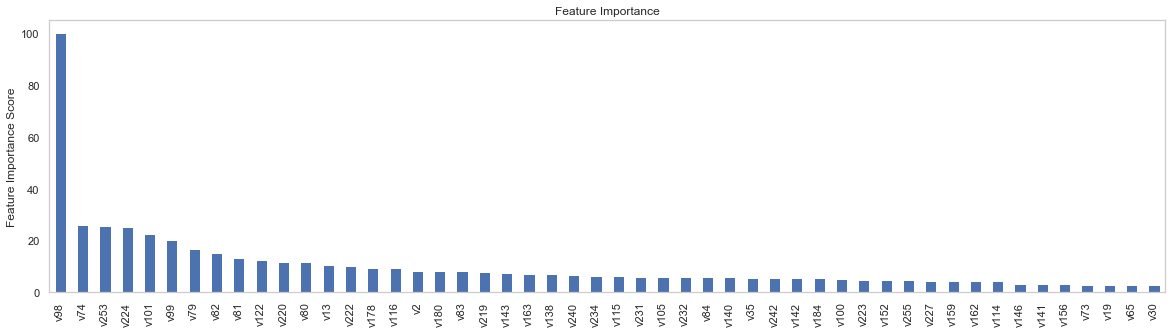

In [32]:
predictors = [x for x in X_reduced.columns]
feature_importance = abs(reduced_log_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feat_imp = pd.Series(feature_importance, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:50]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance')
plt.grid(b=None)
plt.ylabel('Feature Importance Score')

In [19]:
logit_model = sm.Logit(y,X_reduced)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.446377
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.355     
Dependent Variable: satisfied        AIC:              27068.0559
Date:               2020-03-28 14:06 BIC:              27957.3988
No. Observations:   30080            Log-Likelihood:   -13427.   
Df Model:           106              LL-Null:          -20827.   
Df Residuals:       29973            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
v1       -0.0147     0.0078    -1.8738   0.0610   -0.0300    0.0007
v2       -0.0856     0.0206    -4.1617   0.0000   -0.1259 

In [ ]:
X_test_reduced = test.loc[:, selected_features_rfe]
y_pred_reduced_log_model = reduced_log_model.predict(X_test_reduced)
test_pred_reduced_log_model = pd.DataFrame({'id': test_ids, 'Predicted':y_pred_reduced_log_model})
test_pred_reduced_log_model

In [ ]:
test_pred_reduced_log_model.to_csv("test_pred_reduced_log_model.csv", index=False)